# XGBoost

In [1]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/software_defect.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/software_defect.parquet')

In [5]:
y_train = train.defects
X_train = train.drop(columns=['defects'])

In [6]:
y_validation = validation.defects
X_validation = validation.drop(columns=['defects'])

In [7]:
exploratory_depths =[2, 3, 4, 5, 6]
exploratory_estimators = [50, 100, 200, 400, 500]
exploratory_learn_rate = [0.05, 0.1, 0.5, 0.7]

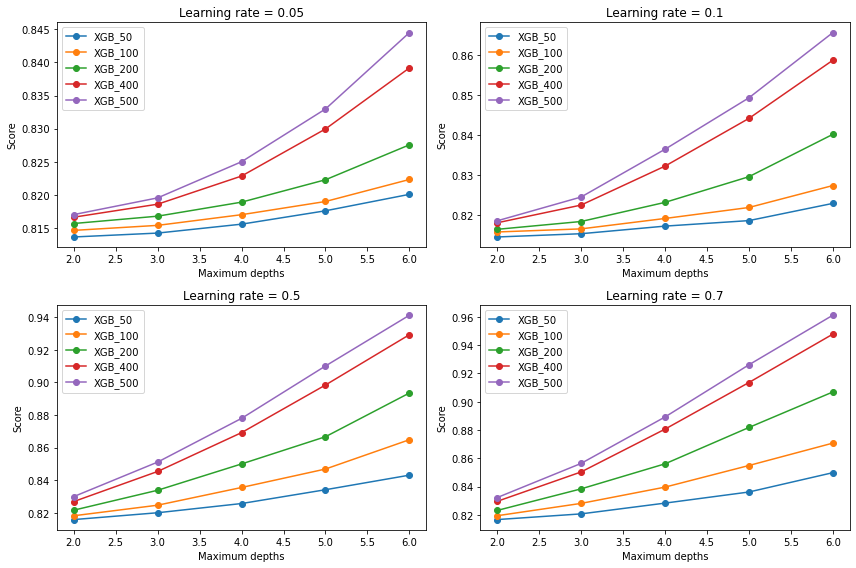

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 0].set_xlabel('Maximum depths')
axs[0, 0].set_ylabel('Score')
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[0, 1].set_xlabel('Maximum depths')
axs[0, 1].set_ylabel('Score')
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 0].set_xlabel('Maximum depths')
axs[1, 0].set_ylabel('Score')
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()
axs[1, 1].set_xlabel('Maximum depths')
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [11]:
max_depth = [3, 4, 5, 6]
n_estimators = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
learn_rate = [0.1, 0.2, 0.5, 0.7]

In [12]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(XGBClassifier(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('XGB_'+str(n)+'_'+str(d)+'_'+str(l))

In [13]:
metrics = classification(models_list, names_list, '../../../data/metrics/software_defect/xgboost.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
XGB_100_3_0.1,3.223899,0.796071,0.793323,-0.345228
XGB_100_3_0.2,2.854449,0.799245,0.793086,-0.770636
XGB_100_3_0.5,2.497166,0.807666,0.789589,-2.238260
XGB_100_3_0.7,1.799101,0.810323,0.786746,-2.909606
XGB_100_4_0.1,2.314249,0.801665,0.793554,-1.011805
...,...,...,...,...
XGB_650_5_0.7,15.998412,0.979490,0.729225,-25.550475
XGB_650_6_0.1,21.994149,0.893639,0.781816,-12.513232
XGB_650_6_0.2,21.140955,0.948162,0.768361,-18.963152
XGB_650_6_0.5,20.263145,0.990983,0.734340,-25.897893


In [15]:
metrics.sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
XGB_150_3_0.1,2.341352,0.797997,0.793642,-0.545676
XGB_200_3_0.1,3.307323,0.799535,0.793587,-0.743879
XGB_100_4_0.1,2.314249,0.801665,0.793554,-1.011805
XGB_150_4_0.1,3.285869,0.804680,0.793476,-1.392312
XGB_300_3_0.1,4.588458,0.802561,0.793461,-1.133804
...,...,...,...,...
XGB_450_6_0.7,15.239446,0.989210,0.726700,-26.537318
XGB_500_6_0.7,15.066854,0.991733,0.725277,-26.867722
XGB_600_6_0.7,20.378941,0.995617,0.724643,-27.216707
XGB_550_6_0.7,16.424766,0.993807,0.724117,-27.136981


The best model is **XGB_150_3_0.1** because it achieves the highest AUC in validation and the delta is almost zero.

In [16]:
test = pd.read_parquet('../../../data/model_input/test_sets/software_defect.parquet')

In [17]:
y_test = test.defects
X_test = test.drop(columns=['defects'])

In [18]:
retrain = pd.concat([train, validation])

In [19]:
y_retrain = retrain.defects
X_retrain = retrain.drop(columns=['defects'])

In [20]:
model = XGBClassifier(n_estimators=150, max_depth=3, learning_rate=0.1).fit(X_retrain, y_retrain)

In [21]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.7938


In [22]:
dump(model, 'best_xgboost.joblib')

['best_xgboost.joblib']

In [23]:
with open('../../../data/metrics/software_defect/final_AUC.txt', 'a') as f:
    f.write('\nXGB, '+ str(auc))